<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/ANS_Penguin_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim to group the penguins in clusters with similar bodily traits

# Preprocessing the data

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN



In [ ]:
df=pd.read_csv('/content/penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df[df.duplicated()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=df.drop_duplicates()
df1.shape

(343, 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.1+ KB


In [ ]:
df.replace('', np.nan, inplace=True)
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Filling null values with mode.

In [ ]:
df1=df1.fillna(df1.mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   343 non-null    float64
 1   culmen_depth_mm    343 non-null    float64
 2   flipper_length_mm  343 non-null    float64
 3   body_mass_g        343 non-null    float64
 4   sex                343 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.1+ KB


In [ ]:
df['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [ ]:
df['sex'] = df['sex'].replace('.', np.nan)


In [ ]:
print(df['sex'].isnull().sum())


10


In [ ]:
mode_sex = df['sex'].mode()[0]
df['sex'].fillna(mode_sex, inplace=True)
print(df['sex'].isnull().sum())

0


In [ ]:
# Encoding the Target Variable.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])

df['sex'].unique()

array([1, 0])

In [ ]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [ ]:
# Convert all float columns to int, handling NaN with 'int64' dtype
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).astype('int64')


In [ ]:
df.dtypes

culmen_length_mm     int64
culmen_depth_mm      int64
flipper_length_mm    int64
body_mass_g          int64
sex                  int64
dtype: object

In [ ]:
mode_culmen_length_mm = df['culmen_length_mm'].mode()[0]
df['culmen_length_mm'].fillna(mode_culmen_length_mm, inplace=True)
print(df['culmen_length_mm'].isnull().sum())

0


In [ ]:
mode_culmen_depth_mm= df['culmen_depth_mm'].mode()[0]
df['culmen_depth_mm'].fillna(mode_culmen_depth_mm, inplace=True)
print(df['culmen_depth_mm'].isnull().sum())

0


In [ ]:
mode_flipper_length_mm = df['flipper_length_mm'].mode()[0]
df['flipper_length_mm'].fillna(mode_flipper_length_mm, inplace=True)
print(df['flipper_length_mm'].isnull().sum())

0


In [ ]:
mode_body_mass_g = df['body_mass_g'].mode()[0]
df['body_mass_g'].fillna(mode_body_mass_g, inplace=True)
print(df['body_mass_g'].isnull().sum())

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   culmen_length_mm   344 non-null    int64
 1   culmen_depth_mm    344 non-null    int64
 2   flipper_length_mm  344 non-null    int64
 3   body_mass_g        344 non-null    int64
 4   sex                344 non-null    int64
dtypes: int64(5)
memory usage: 13.6 KB


In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

<Axes: >

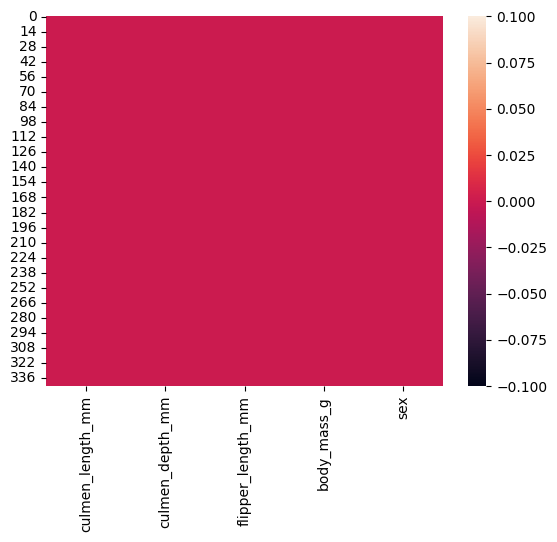

In [ ]:
# to verify the removal of null values
sns.heatmap(df.isnull())

<Axes: >

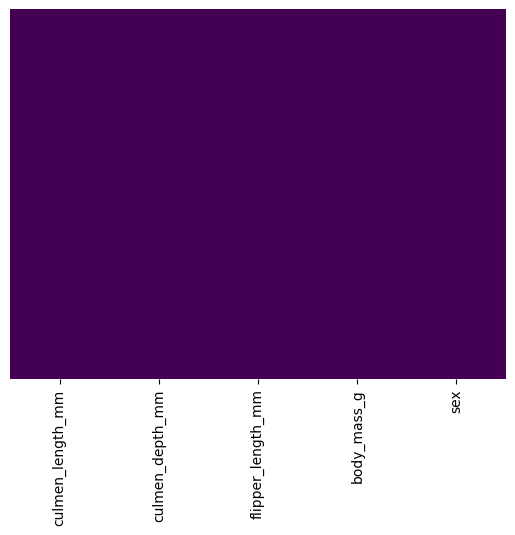

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df['sex'].value_counts()

sex
1    179
0    165
Name: count, dtype: int64

In [ ]:
# Standatdizing the dataset
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
df_scaled

array([[-0.82141476,  0.64258866, -0.12672215, -0.56245242,  0.96009776],
       [-0.82141476,  0.13905677, -0.10744882, -0.49987686, -1.0415606 ],
       [-0.63792991,  0.64258866, -0.07275682, -1.18820802, -1.0415606 ],
       ...,
       [ 1.19691866, -0.86800701,  0.03131916,  1.94056999,  0.96009776],
       [ 0.27949437, -1.3715389 , -0.0072275 ,  1.25223883, -1.0415606 ],
       [ 1.0134338 , -0.36447512, -0.00337283,  1.50254107,  0.96009776]])

In [ ]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Loading a DBSCAN model

In [ ]:
model = DBSCAN(min_samples=15) # the min sample count refers to minimum no of datapoints to be included in the cluster.Here we choose 15 as we can ensure less clusters to be formed.
model

DBSCAN(min_samples=15)

Fitting the model to the cleaned data.

In [ ]:
model.fit(df_scaled)

DBSCAN(min_samples=15)

In [ ]:
model.labels_

array([ 0,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1,  0,  1, -1,  0, -1,  0,  1,  0,
        1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  1, -1,  1,
        0,  1, -1, -1,  0,  1,  0, -1, -1, -1, -1,  1,  0,  1,  0, -1, -1,
       -1, -1, -1,  0,  1, -1,  1,  0, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1,  0,  1,  0,  1,  0, -1,  0, -1,  0,  1, -1,
       -1, -1, -1,  0,  1, -1,  1, -1, -1, -1,  1, -1, -1,  0,  1, -1,  1,
        0,  1, -1,  1,  0, -1, -1,  1,  0,  1,  0,  1, -1, -1,  0,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1,  1,  0,  1,  0, -1,
        2,  2, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1,
       -1, -1,  1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1,  2,  1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1,
       -1,  3,  4, -1, -1

In [ ]:
set(list(model.labels_))

{-1, 0, 1, 2, 3, 4}

Creating a dataframe named class_ and the column is named as 'cluster_values'.

In [ ]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [ ]:
class_

,cluster_values
0,0
1,1
2,-1
3,-1
4,-1
...,...
339,-1
340,3
341,4
342,3


In [ ]:
# Merging the new created dataframe (class_) with the cleaned dataset.

In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39,18,181,3750,1
1,39,17,186,3800,0
2,40,18,195,3250,0
3,41,17,190,3800,1
4,36,19,193,3450,0
...,...,...,...,...,...
339,41,17,190,3800,1
340,46,14,215,4850,0
341,50,15,222,5750,1
342,45,14,212,5200,0


In [ ]:
df_final=pd.concat([df,class_],axis=1)
df_final.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
0,39,18,181,3750,1,0
1,39,17,186,3800,0,1
2,40,18,195,3250,0,-1
3,41,17,190,3800,1,-1
4,36,19,193,3450,0,-1


# Till here the clustering is completed Now to **Generate inference** and **Display the DBSCAN output graph**

In [ ]:
df_final['cluster_values'].unique()

array([ 0,  1, -1,  2,  3,  4])

In [ ]:
df_final[df_final['cluster_values']==-1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
2,40,18,195,3250,0,-1
3,41,17,190,3800,1,-1
4,36,19,193,3450,0,-1
5,39,20,190,3650,1,-1
7,39,19,195,4675,1,-1
...,...,...,...,...,...,...
336,44,15,217,4875,1,-1
337,48,16,222,6000,1,-1
338,47,13,214,4925,0,-1
339,41,17,190,3800,1,-1


In [ ]:
df_final[df_final['cluster_values']==0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
0,39,18,181,3750,1,0
21,37,18,180,3600,1,0
23,38,18,185,3950,1,0
26,40,18,183,3550,1,0
29,40,18,180,3950,1,0
31,37,18,178,3900,1,0
33,40,18,184,3900,1,0
41,40,18,195,3900,1,0
45,39,18,190,4600,1,0
51,40,18,188,4300,1,0


In [ ]:
df_final[df_final['cluster_values']==1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
1,39,17,186,3800,0,1
6,38,17,181,3625,0,1
12,41,17,182,3200,0,1
15,36,17,185,3700,0,1
27,40,17,187,3200,0,1
32,39,17,188,3300,0,1
34,36,17,195,3325,0,1
48,36,17,190,3450,0,1
50,39,17,186,3500,0,1
52,35,17,190,3450,0,1


In [ ]:
df_final[df_final['cluster_values']==2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
153,50,19,196,3900,1,2
154,51,19,193,3650,1,2
156,52,19,197,3725,1,2
161,51,19,198,3700,1,2
167,50,19,201,4050,1,2
175,50,19,193,3800,1,2
177,52,19,197,4150,1,2
179,49,19,200,3800,1,2
192,49,19,210,3950,1,2
194,50,19,196,3550,1,2


In [ ]:
df_final[df_final['cluster_values']==3]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
222,48,14,210,4450,0,3
226,45,14,211,4800,0,3
238,46,14,209,4800,0,3
241,45,14,215,5000,0,3
242,46,14,213,4400,0,3
248,48,14,210,4600,0,3
251,42,14,209,4700,0,3
252,45,14,207,5050,0,3
270,46,14,210,4850,0,3
272,45,14,210,4400,0,3


In [ ]:
df_final[df_final['cluster_values']==4]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
223,50,15,218,5700,1,4
227,46,15,219,5200,1,4
229,46,15,215,5150,1,4
235,49,15,217,5850,1,4
239,48,15,222,5350,1,4
245,46,15,215,5100,1,4
247,47,15,215,5650,1,4
249,50,15,220,5550,1,4
250,47,15,222,5250,1,4
259,48,15,208,5350,1,4


To find the no of data points in each cluster the 'value_counts' method can be used . As seen below the cluster with name as -1 has the noise points and the below execution shows that tere are 209 points that are noise to the data. these are neither the core nor the boundary points. Thus a lot of data is being wasted and is not being analyzed as it is outlier.

In [ ]:
df_final[df_final['cluster_values']==-1].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
41                17               190                3800         1    -1                2
48                16               222                6000         1    -1                1
46                17               187                3650         0    -1                1
                                   191                3700         0    -1                1
                                   192                3500         0    -1                1
                                                                                         ..
41                21               195                4400         1    -1                1
42                13               208                3950         0    -1                1
                                   210                4150         0    -1                1
                                   213                4950         0    -1           

# Visualising the clusters created using DBSCAN.

Splitting the data in x and y parts with y being the array of cluster no.plotting the

In [ ]:
input_x = df_final.iloc[:,:-1].values
input_x

array([[  39,   18,  181, 3750,    1],
       [  39,   17,  186, 3800,    0],
       [  40,   18,  195, 3250,    0],
       ...,
       [  50,   15,  222, 5750,    1],
       [  45,   14,  212, 5200,    0],
       [  49,   16,  213, 5400,    1]])

In [ ]:
output_y=df_final.iloc[:,-1].values
output_y

array([ 0,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1,  0,  1, -1,  0, -1,  0,  1,  0,
        1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  1, -1,  1,
        0,  1, -1, -1,  0,  1,  0, -1, -1, -1, -1,  1,  0,  1,  0, -1, -1,
       -1, -1, -1,  0,  1, -1,  1,  0, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1,  0,  1,  0,  1,  0, -1,  0, -1,  0,  1, -1,
       -1, -1, -1,  0,  1, -1,  1, -1, -1, -1,  1, -1, -1,  0,  1, -1,  1,
        0,  1, -1,  1,  0, -1, -1,  1,  0,  1,  0,  1, -1, -1,  0,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1,  1,  0,  1,  0, -1,
        2,  2, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1,
       -1, -1,  1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1,  2,  1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1,
       -1,  3,  4, -1, -1

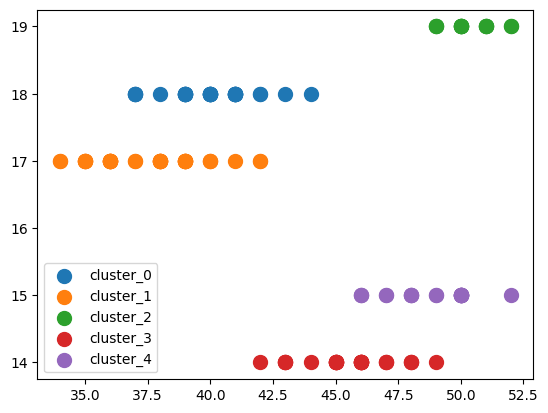

In [ ]:
#Plotting the clusters
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.scatter(input_x[output_y==3,0],input_x[output_y==3,1],s=100, label='cluster_3')
plt.scatter(input_x[output_y==4,0],input_x[output_y==4,1],s=100, label='cluster_4')
plt.legend()
plt.show()

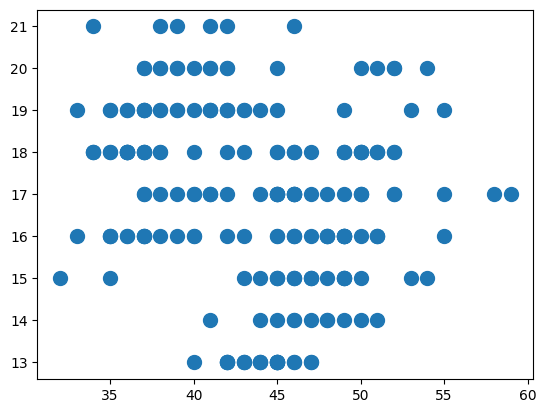

In [ ]:
#plotting noise points
plt.scatter(input_x[output_y==-1,0],input_x[output_y==-1,1],s=100, label='noise')

**Inference**
1) with e=0.5, min_pts=15
we get 5 clusters and 209 noise pts .. thus alot of pts are being missed .

# Iteration of models with different epsilon values to reduce the no of outliers and to make use of maximum data availabe

In [ ]:
model1 = DBSCAN(eps=0.6, min_samples=5)
model1.fit(df_scaled)

DBSCAN(eps=0.6)

In [ ]:
set(list(model1.labels_))

{-1, 0, 1, 2, 3, 4}

In [ ]:
class_1 = pd.DataFrame(model1.labels_,columns=['cluster_values'])


In [ ]:
df_final1=pd.concat([df,class_1],axis=1)
df_final1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
0,39,18,181,3750,1,0
1,39,17,186,3800,0,1
2,40,18,195,3250,0,1
3,41,17,190,3800,1,0
4,36,19,193,3450,0,1
...,...,...,...,...,...,...
339,41,17,190,3800,1,0
340,46,14,215,4850,0,3
341,50,15,222,5750,1,4
342,45,14,212,5200,0,3


In [ ]:
df_final1[df_final1['cluster_values']==-1].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
34                21               -132               4400         1    -1                1
46                21                194               4200         1    -1                1
58                17                181               3700         0    -1                1
55                16                230               5850         1    -1                1
54                20                201               4300         1    -1                1
52                20                210               4800         1    -1                1
                                    205               4550         1    -1                1
47                13                216               4725         1    -1                1
46                16                192               2700         0    -1                1
37                18                179               2975         1    -1           

With hyper parameter tuning as  e=0.6 and min_samples=5

We see 5 clusters with 17 outliers

In [ ]:
# repeating DBSCAN with DIfferent e and min_pt values
model2 = DBSCAN(eps=0.7, min_samples=5)
model2.fit(df_scaled)

DBSCAN(eps=0.7)

In [ ]:
set(list(model2.labels_))

{-1, 0, 1, 2, 3, 4}

In [ ]:
class_2 = pd.DataFrame(model2.labels_,columns=['cluster_values'])

In [ ]:
# merging the cluster columns
df_final2=pd.concat([df,class_2],axis=1)
df_final2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
0,39,18,181,3750,1,0
1,39,17,186,3800,0,1
2,40,18,195,3250,0,1
3,41,17,190,3800,1,0
4,36,19,193,3450,0,1
...,...,...,...,...,...,...
339,41,17,190,3800,1,0
340,46,14,215,4850,0,3
341,50,15,222,5750,1,4
342,45,14,212,5200,0,3


In [ ]:
df_final2[df_final2['cluster_values']==-1].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
34                21               -132               4400         1    -1                1
39                20                191               3900         0    -1                1
42                17                196               4700         1    -1                1
                  20                5000              4250         1    -1                1
44                14                216               4100         1    -1                1
46                21                194               4200         1    -1                1
55                16                230               5850         1    -1                1
58                17                181               3700         0    -1                1
59                17                230               6050         1    -1                1
Name: count, dtype: int64

With hyper parameter tuning as  e=0.7 and min_samples=5

We see 5 clusters with 9 outliers

In [ ]:
model3 = DBSCAN(eps=0.8, min_samples=5)
model3.fit(df_scaled)

DBSCAN(eps=0.8)

In [ ]:
set(list(model3.labels_))

{-1, 0, 1, 2, 3}

In [ ]:
class_3 = pd.DataFrame(model3.labels_,columns=['cluster_values'])

In [ ]:
df_final3=pd.concat([df,class_3],axis=1)
df_final3

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_values
0,39,18,181,3750,1,0
1,39,17,186,3800,0,1
2,40,18,195,3250,0,1
3,41,17,190,3800,1,0
4,36,19,193,3450,0,1
...,...,...,...,...,...,...
339,41,17,190,3800,1,0
340,46,14,215,4850,0,2
341,50,15,222,5750,1,3
342,45,14,212,5200,0,2


In [ ]:
df_final3[df_final3['cluster_values']==-1].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
34                21               -132               4400         1    -1                1
42                20                5000              4250         1    -1                1
58                17                181               3700         0    -1                1
59                17                230               6050         1    -1                1
Name: count, dtype: int64

With hyper parameter tuning as  e=0.8 and min_samples=5

We see 4 clusters with 4 outliers

In [ ]:
df_final3[df_final3['cluster_values']==0].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
41                17               190                3800         1    0                 2
34                18               193                3475         1    0                 1
43                19               197                4775         1    0                 1
49                19               200                3800         1    0                 1
                  18               195                4400         1    0                 1
                                                                                         ..
40                17               187                3475         1    0                 1
39                21               196                4150         1    0                 1
                  20               190                3650         1    0                 1
                  19               195                4675         1    0            

In [ ]:
df_final3[df_final3['cluster_values']==1].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
32                15               188                3050         0    1                 1
45                16               191                3250         0    1                 1
43                16               187                2900         0    1                 1
42                18               180                3550         0    1                 1
                  17               187                3350         0    1                 1
                                                                                         ..
36                18               187                3800         0    1                 1
                                   186                3100         0    1                 1
                                   184                3475         0    1                 1
                                   182                3150         0    1            

In [ ]:
df_final3[df_final3['cluster_values']==2].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
40                13               214                4650         0    2                 1
46                15               216                4700         0    2                 1
45                14               215                5000         0    2                 1
                                   219                4700         0    2                 1
46                13               210                4550         0    2                 1
                                   211                4500         0    2                 1
                  14               209                4800         0    2                 1
                                   210                4850         0    2                 1
                                   213                4400         0    2                 1
                                   215                4850         0    2            

In [ ]:
df_final3[df_final3['cluster_values']==3].value_counts()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  cluster_values
44                14               216                4100         1    3                 1
50                15               225                5000         1    3                 1
49                16               216                5550         1    3                 1
                                   224                5650         1    3                 1
                                   225                5700         1    3                 1
                                                                                         ..
48                16               230                5800         1    3                 1
49                15               216                4750         1    3                 1
                                                      4925         1    3                 1
                                   217                5850         1    3            

# Visualizing the clusters with Scatter plot

In [ ]:
input_x3= df_final3.iloc[:,:-1].values
input_x3

array([[  39,   18,  181, 3750,    1],
       [  39,   17,  186, 3800,    0],
       [  40,   18,  195, 3250,    0],
       ...,
       [  50,   15,  222, 5750,    1],
       [  45,   14,  212, 5200,    0],
       [  49,   16,  213, 5400,    1]])

In [ ]:
output_y3=df_final3.iloc[:,-1].values
output_y3

array([ 0,  1,  1,  0,  1,  0,  1,  0,  0, -1,  0,  0,  1,  0, -1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0, -1,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  2,
        3,  2,  3,  3,  2

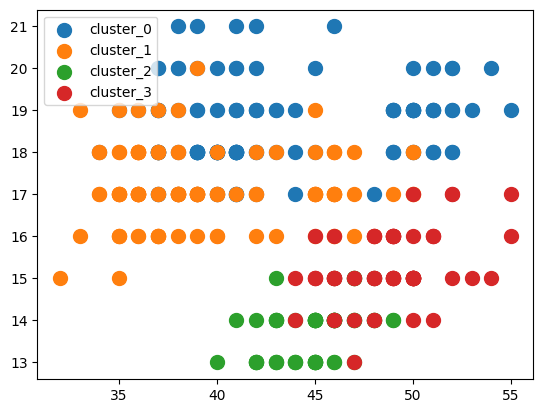

In [ ]:
#Plotting the clusters
plt.scatter(input_x3[output_y3==0,0],input_x3[output_y3==0,1],s=100, label='cluster_0')
plt.scatter(input_x3[output_y3==1,0],input_x3[output_y3==1,1],s=100, label='cluster_1')
plt.scatter(input_x3[output_y3==2,0],input_x3[output_y3==2,1],s=100, label='cluster_2')
plt.scatter(input_x3[output_y3==3,0],input_x3[output_y3==3,1],s=100, label='cluster_3')
plt.legend()
plt.show()


# To visualise Pairwise relationship in the dataset,across multiple feature pairs.

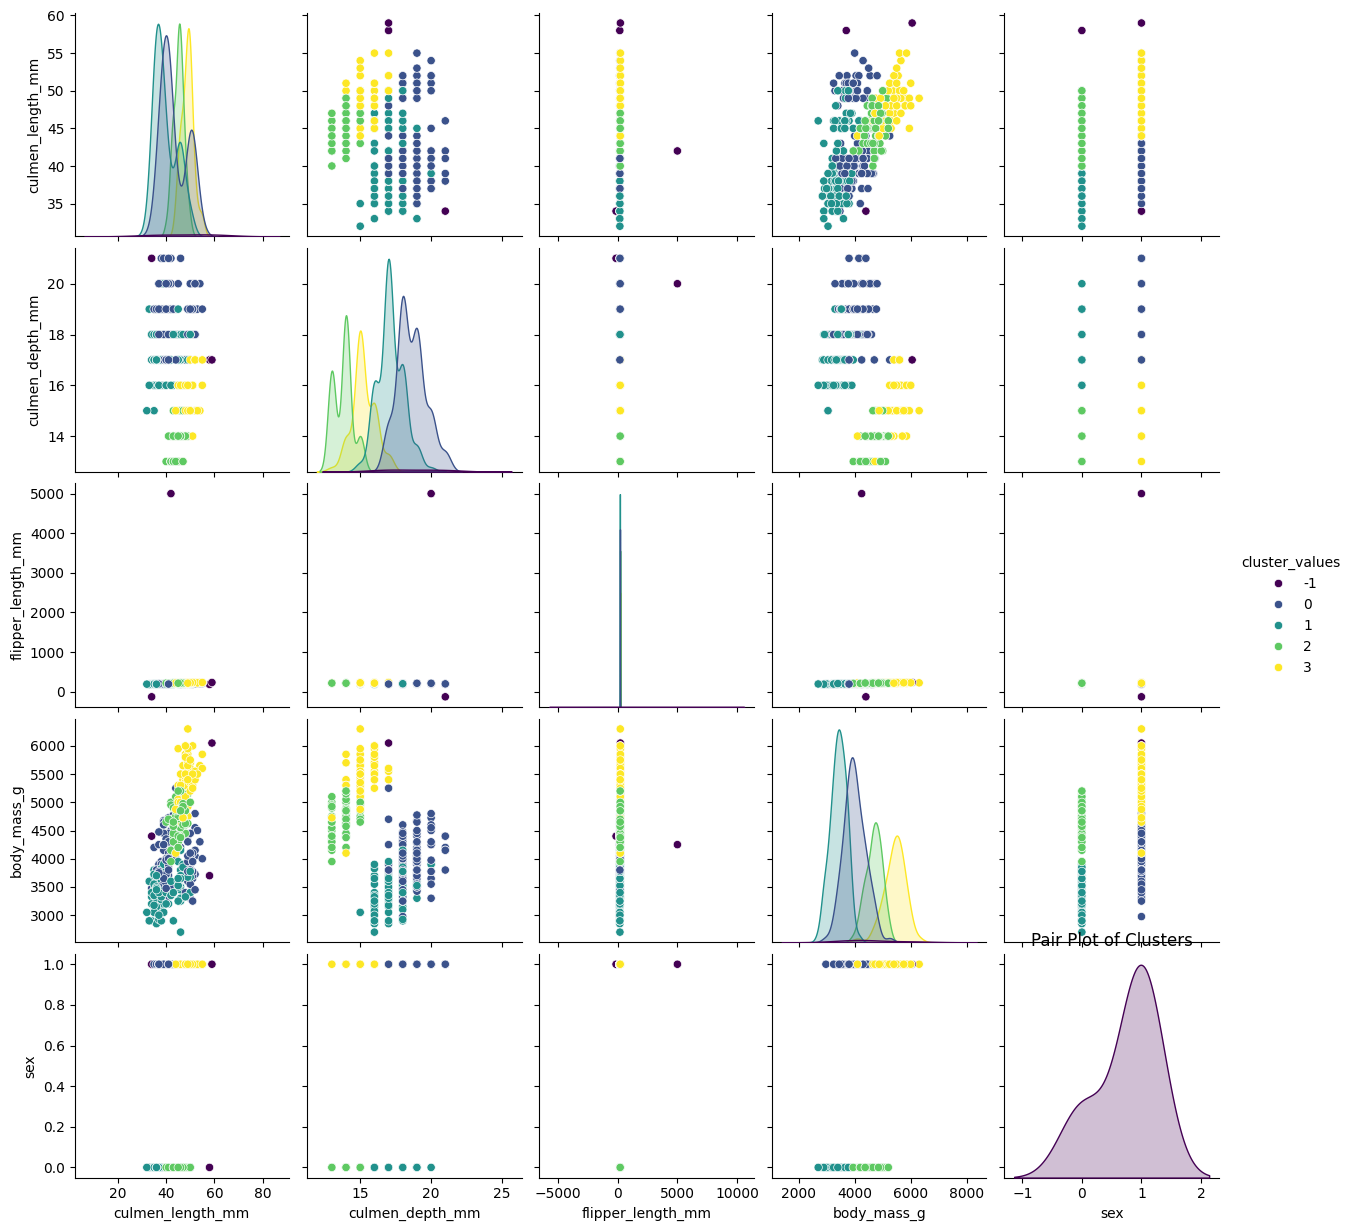

In [ ]:
sns.pairplot(df_final3, hue='cluster_values', palette='viridis')
plt.title('Pair Plot of Clusters')
plt.show()


In [ ]:
min_value = df_final['body_mass_g'].min()
max_value = df_final['body_mass_g'].max()
print(min_value)
print(max_value)

2700
6300


In [ ]:
mode=df_final['body_mass_g'].mode()
print(mode)

0    3800
Name: body_mass_g, dtype: int64


From above result when we try to encompass more data points with e=0.8 we see that the clusters are formed considering the 'flipper_length_mm' as the core feature.  